In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn import preprocessing
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_rows', 500)

In [2]:
def read_data_file(filemame):
    df = pd.read_csv(filemame, header=None)
    df.columns = ["Exam1Score", "Exam2Score", "AdmitORNot"]
    df2 = df.copy(deep=True)
    return df

def segregate_x_y(df):
    df_x = df[["Exam1Score", "Exam2Score"]]  # single [] gives error in this case
    df_y = df[["AdmitORNot"]]  # if i put single [] then it return series and [[]] return dataframe
    return df_x, df_y

def segregate_x_into_pass_fail(df_x, df_y):
    mask_pass = df_y["AdmitORNot"] == 1
    df_x_pass = df_x[mask_pass]
    df_x_fail = df_x[~mask_pass]
    return df_x_pass, df_x_fail, mask_pass

def plot_pass_fail(df_x_pass, df_x_fail):
    plt.scatter(df_x_pass["Exam1Score"], df_x_pass["Exam2Score"], marker="o", color="green", label="Admitted")
    plt.scatter(df_x_fail["Exam1Score"], df_x_fail["Exam2Score"], marker="o", color="red", label="Not Admitted")
    plt.xlabel("Exam1 Score")
    plt.ylabel("Exam2 Score")
    plt.legend(loc="best")
    return plt

def fit_x(df_x, df_y):
    x = np.c_[np.ones(df_x.shape[0]), df_x] # this will change you data frame to numpy array
    theta = np.zeros((x.shape[1], 1))
    y = df_y.to_numpy()                     # here are are manually using function to convert dataframe to numpy array
    return x, y, theta

def z(x, theta):
    return np.dot(x, theta)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))  # note outer brackets in denominator are important else it bad/wrong result.

def cost_function(theta, x, y):
    m = x.shape[0]
    h = sigmoid(z(x, theta))
    j = (1 / m) * (np.dot(np.log(h).T, -y) - np.dot(np.log(1 - h).T, (1 - y)))
    return j

def first_deri_j(theta, x, y):
    m = x.shape[0]
    h = sigmoid(z(x, theta))
    calculation = (1 / m) * (np.dot((h - y).T, x))
    return calculation.T

def accuracy(predicted_y, df_y):
    diff = predicted_y - df_y
    return (float(np.count_nonzero(diff)) / len(diff))

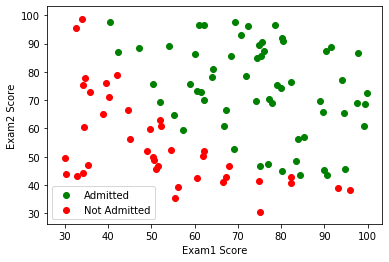

In [3]:
df = read_data_file("ex2data1.txt")
df_x, df_y = segregate_x_y(df)
df_x_pass, df_x_fail, mask = segregate_x_into_pass_fail(df_x, df_y)
plt = plot_pass_fail(df_x_pass, df_x_fail)

In [4]:
mask

0     False
1     False
2     False
3      True
4      True
5     False
6      True
7      True
8      True
9      True
10    False
11    False
12     True
13     True
14    False
15     True
16     True
17    False
18     True
19     True
20    False
21     True
22    False
23    False
24     True
25     True
26     True
27    False
28    False
29    False
30     True
31     True
32    False
33     True
34    False
35    False
36    False
37     True
38    False
39    False
40     True
41    False
42     True
43    False
44    False
45    False
46     True
47     True
48     True
49     True
50     True
51     True
52     True
53    False
54    False
55    False
56     True
57    False
58     True
59     True
60     True
61    False
62    False
63    False
64    False
65    False
66     True
67    False
68     True
69     True
70    False
71     True
72     True
73     True
74     True
75     True
76     True
77     True
78    False
79    False
80     True
81     True
82     True
83  

In [5]:
df2 = df.copy(deep=True)
df2 = preprocessing.scale(df2)

In [6]:
df2 = pd.DataFrame({'Exam1Score': df2[:, 0], 'Exam2Score': df2[:, 1], 'AdmitORNot': df2[:, 2]})

In [7]:
df2_x, df2_y = segregate_x_y(df2)

In [8]:
x, y, theta = fit_x(df2_x, df2_y)

In [9]:
initial_cost = cost_function(theta, x, y)
initial_cost

array([[0.69314718]])

In [10]:
def batch_graident_decent(theta, x, y, alpha = 0.001, convergence=0.001):
    cost_list = list()
    old_cost=0
    change_in_cost = 0
    i = 0
    while i < 1000:
        theta = theta - (alpha*first_deri_j(theta, x, y))
        cost = cost_function(theta, x, y)
        change_in_cost = cost - old_cost
        old_cost = cost
        i = i + 1
    return theta, i

theta, i = batch_graident_decent(theta, x, y)
print("New Theta from Graident descent = ", theta)
print("Number of iterations =", i)
print("cost with this theta is =",cost_function(theta, x, y) )

New Theta from Graident descent =  [[-0.4457928 ]
 [ 0.51331045]
 [ 0.45798748]]
Number of iterations = 1000
cost with this theta is = [[0.01855925]]


In [11]:
df2_x_pass = df2_x[mask]
df2_x_fail = df2_x[~mask]

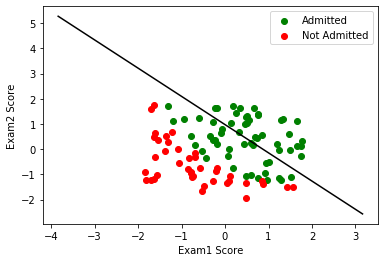

In [12]:
plt = plot_pass_fail(df2_x_pass, df2_x_fail)
x1 = np.arange(  np.min(df2["Exam1Score"]-2)  , np.max(df2["Exam2Score"]+2)  )
x2 = -(theta[0] + theta[1] * x1) / theta[2]
plt.plot(x1, x2, c='k', label='reg line')
plt.show()

In [13]:
df2["probability"] = sigmoid(z(x, theta))

In [14]:
df2.loc[df2['probability'] >= .5  , 'ZeroOROne'] = 1
df2.loc[df2['probability']  < .5  , 'ZeroOROne'] = 0

In [15]:
df2

,Exam1Score,Exam2Score,AdmitORNot,probability,ZeroOROne
0,-1.602248,0.638341,-1.224745,0.273708,0.0
1,-1.826256,-1.207541,-1.224745,0.126058,0.0
2,-1.539040,0.361294,-1.224745,0.255340,0.0
3,-0.282101,1.086368,0.816497,0.476753,0.0
4,0.691528,0.493378,0.816497,0.533733,1.0
5,-1.061997,-0.535739,-1.224745,0.225083,0.0
6,-0.234372,1.638184,0.816497,0.545913,1.0
7,0.484511,-1.063730,0.816497,0.335310,0.0
8,0.539987,1.146511,0.816497,0.588187,1.0
9,0.970448,-1.227099,0.816497,0.375276,0.0


In [16]:
df2.to_csv("Manual_result.csv", sep=',', encoding='utf-8')